# Econ 323 Final Project

### Authors: Nolan Petroff and Shaan Hooey

## Introduction to Topic and Data

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import os
import sklearn as sk

%matplotlib inline

# Context and Motivation for our Project
Oil is one of Canada's largest exports both by volume and value. Given a variety of factors including the grade of the oil found in Canada compared to elsewhere, Canadian crude (WCS) is priced at a discount to standard American crude (WTI). In the last few years, industry experts have sounded alarm bells regarding the increasing impact of this price differential, and they are concerned about how large it could become in the future. The differential has frequently ballooned to 30 or 40 dollars USD per barrel, which has driven a large wedge between the value Canadian producers receive as opposed to American producers of equivalent size. We want to understand the total magnitude of this impact. The equation we will use is directly below:

* Total Differential Impact = Differential Price * Exchange Rate (CAD/USD) * Production per Day

You'll notice that, in addition to price and quantity, we consider the exchange rate in our assessment of impact. This is because oil is an industry of critical importance to Canadian GDP, yet the differential price is measured in USD. Thus, it is important to first convert the differential price to a more relevant currency for Canadians, and then model, using realistic assumptions, the difference in output that can reasonably be achieved through policy action. Our project will proceed as follows:

### Part 1: Introduction of the Data Used + Cleaning/Merging
* We have data from a range of sources. Namely, they contain information on oil differential prices and production, as well as Canadian economic indicators such as GDP and exchange rates. 
* The end goal of this section is to create a new and more usable dataset with all our relevant variables.

### Part 2: Analysis on Which Economic Indicators are Impacted by the Differential
* This will involve some fairly elementary data analysis. What we want to do here is show that the oil industry is large enough that it has widespread impacts on things like GDP and the exchange rate. 
* We want to quantify the impact of the differential. This means finding a dollar value, according to the equation above, representing how much less Canadian producers receive compared to if they were able to sell nearer to WTI-level prices.

### Part 3: Discussion on the Differential and What "Segments" of it can be Changed
* This will be our most brief section. It will feature a short discussion on what academics deem to be reasonable assumptions for our differential reduction analysis in Part 4.

### Part 4: Sensitivity Analysis based on Realistic Changes to Key Variables to Quantify the Differential
* Given the values determined in Part 3, we want to understand if such changes to the differential price are economically significant.
* Obtaining meaningful results would certainly support our empirical findings in Part 2. From here, we could extrapolate how improving differential prices is likely to impact GDP using Monte Carlo. 
* A Monte Carlo Analysis would allow us to create probability distributions to represent change in differential (our independent variable), amount of production, and exchange rate. From here, we could then print the values for the 25th percentile, 50th percentile (median), mean, and 75th percentile to show how the differential the differential impact changes with a narrowing of the discount.
* The ultimate objective is to put an exact number, based on reasonable assumptions, to how a policy that reduces the differential by x$ is likely to effect Canadian GDP.

### Part 5: Discussion on Policy Implications & Conclusion
* Significant results suggest that public policies aimed at addressing a specific category of the differential may be worthwhile. We give our preliminary thoughts, and discuss logical extensions to our research that may incite more productive discussion on concrete policy action. 

## Part 1: Introduction of the Data Used + Cleaning/Merging
### Table of Contents
#### 1. Oil Prices and the WCS/WTI Differential - introduction to and cleaning of data
#### 2. Canadian Oil Production - introduction to and cleaning of data
#### 3. Canadian GDP - introduction to and cleaning of data
#### 4. Canada - US Exchange Rates - introduction to and cleaning of data
#### 5. Creation of a More Useful Combined Dataset

### 1. Oil Prices and the WCS/WTI Differential - Data Pulled from Alberta Economic Dashboard
Source: https://economicdashboard.alberta.ca/oilprice



In [48]:
prices = pd.read_csv('Price Data.csv', parse_dates = ["Data"])
prices.head()

,Number,Data,Blend,Unit,Price,Number2,Data2,Blend2,Unit2,Price6,Differential,Unnamed: 11,Unnamed: 12
0,216755,2005-02-01,WCS,$US/bbl,28.44,216573,02-01-2005 12:00:00 AM,WTI,$US/bbl2,48.05,19.61,NaN,NaN
1,216756,2005-03-01,WCS,$US/bbl,36.50,216574,03/01/2005 12:00:00 AM,WTI,$US/bbl,54.63,18.13,NaN,NaN
2,216757,2005-04-01,WCS,$US/bbl,31.02,216575,04/01/2005 12:00:00 AM,WTI,$US/bbl,53.22,22.20,NaN,NaN
3,216758,2005-05-01,WCS,$US/bbl,27.46,216576,05/01/2005 12:00:00 AM,WTI,$US/bbl,49.87,22.41,NaN,NaN
4,216759,2005-06-01,WCS,$US/bbl,38.16,216577,06/01/2005 12:00:00 AM,WTI,$US/bbl,56.42,18.26,NaN,NaN


This data set isn't too bad but it could definitely be improved. Most of Part 1 will be similar; we want to clean and make our data more accessible. In this case, we're only interested in the prices over time, so we will rename columns with price and date information, and remove the rest.  

In [49]:
#Let's clean this data up a bit
prices = prices.drop(['Number','Number2', 'Data2', 'Unit2', 'Unnamed: 11', 'Unnamed: 12'], axis=1)  
names={"Data":"Date",
       "Blend":"Blend",
       "Unit":"Unit",
       "Price":"WCS Price",
       "Blend2":"Blend",
       "Price6":"WTI Price",
       "Differential":"Differential"}

prices.rename(columns=names, inplace=True)

prices["Differential"] = (prices["Differential"]*-1)

prices.head() #this looks much better 

,Date,Blend,Unit,WCS Price,Blend,WTI Price,Differential
0,2005-02-01,WCS,$US/bbl,28.44,WTI,48.05,-19.61
1,2005-03-01,WCS,$US/bbl,36.50,WTI,54.63,-18.13
2,2005-04-01,WCS,$US/bbl,31.02,WTI,53.22,-22.20
3,2005-05-01,WCS,$US/bbl,27.46,WTI,49.87,-22.41
4,2005-06-01,WCS,$US/bbl,38.16,WTI,56.42,-18.26


Now, we have a much cleaner dataset with the exact columns we need. We tested our changes by using the .head() command, which allows us to see the first five rows of data. As we can see, we have the WCS price in USD, the WTI price in USD, and the differential over time. Also note that we altered the differential to a negative value since it's main interpretation is the "discount" that Canadian crude receives relative to WTI. This is more intuitive as a lower value is worse (from our Canadian view) and a higher value closer to 0 is better. Now, let's plot our data.

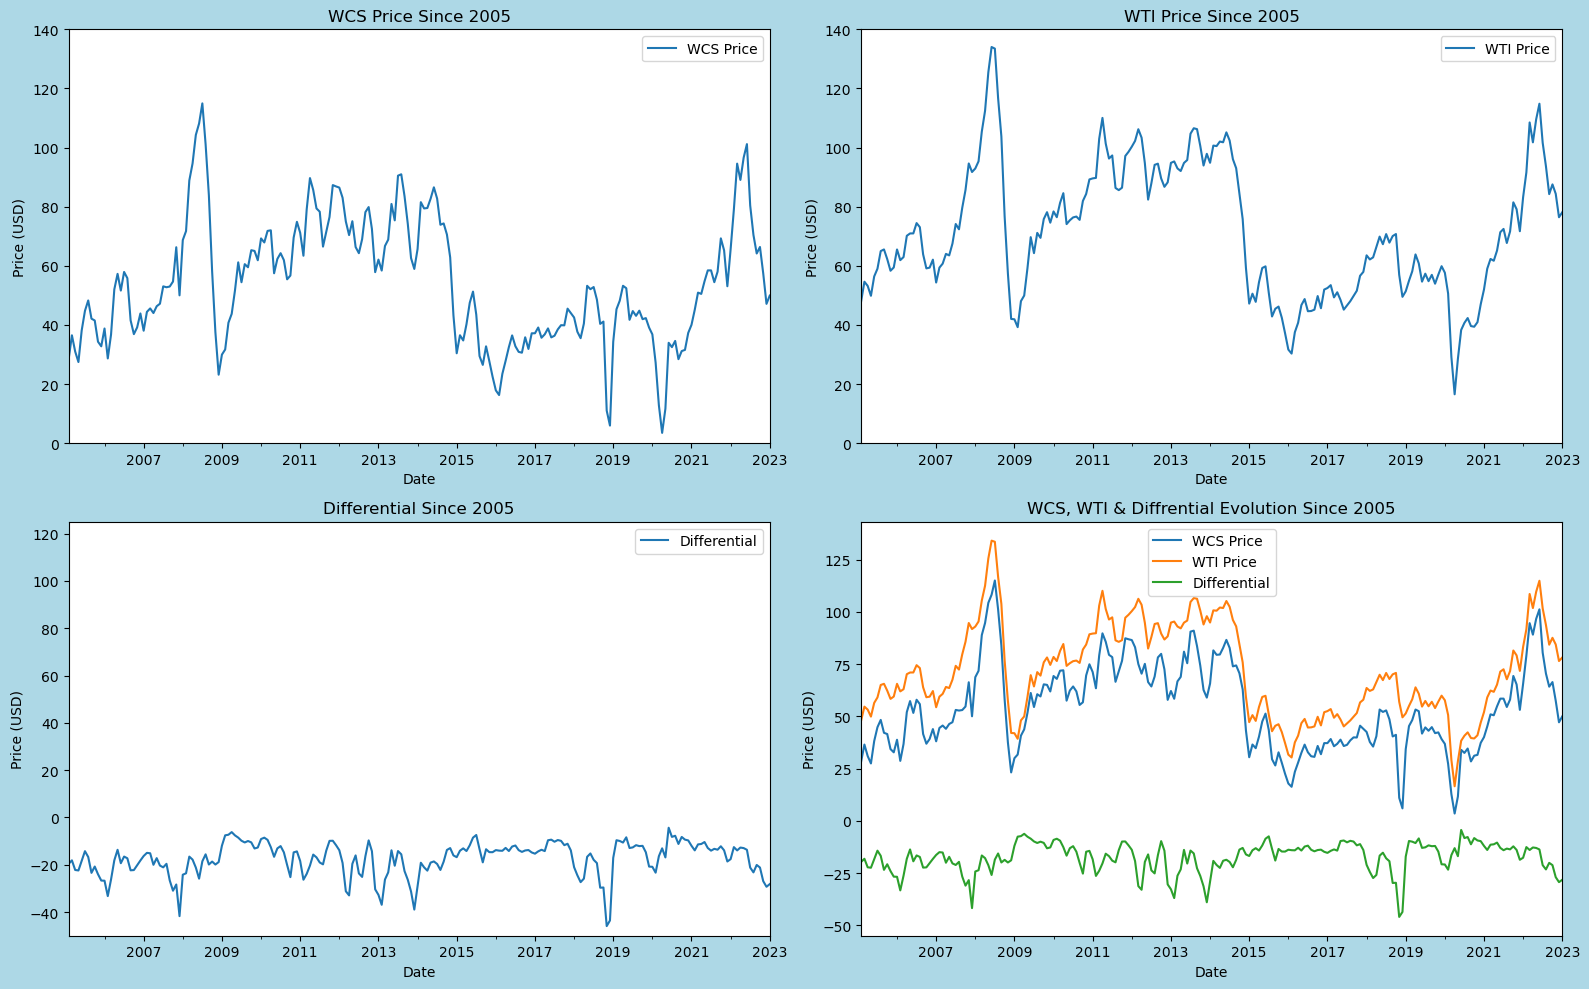

In [50]:
fig, axes = plt.subplots(2,2, figsize = (16,10))
fig.set_facecolor('lightblue')

prices.plot("Date", "WCS Price", 
            title="WCS Price Since 2005", 
            ylabel='Price (USD)', 
            ax = axes[0, 0],
            ylim = (0, 140))

prices.plot("Date", "WTI Price", 
            title="WTI Price Since 2005",
            ylabel='Price (USD)', 
            ax = axes[0, 1],
            ylim = (0, 140))

prices.plot("Date", "Differential", 
            title="Differential Since 2005",
            ylim = (-50, 125),
            ylabel='Price (USD)', 
            ax = axes[1, 0])

prices.plot("Date", ["WCS Price", "WTI Price", "Differential"],
            title='WCS, WTI & Diffrential Evolution Since 2005',
            ylabel='Price (USD)',
            ax = axes[1, 1])

fig.tight_layout()

The graphs above show a lot of variability and it's a bit difficult to see what the 'average' or 'normal 'price is at first glance. Let's make some density plots to get a better idea of the distribution for each of our three relevant prices. 

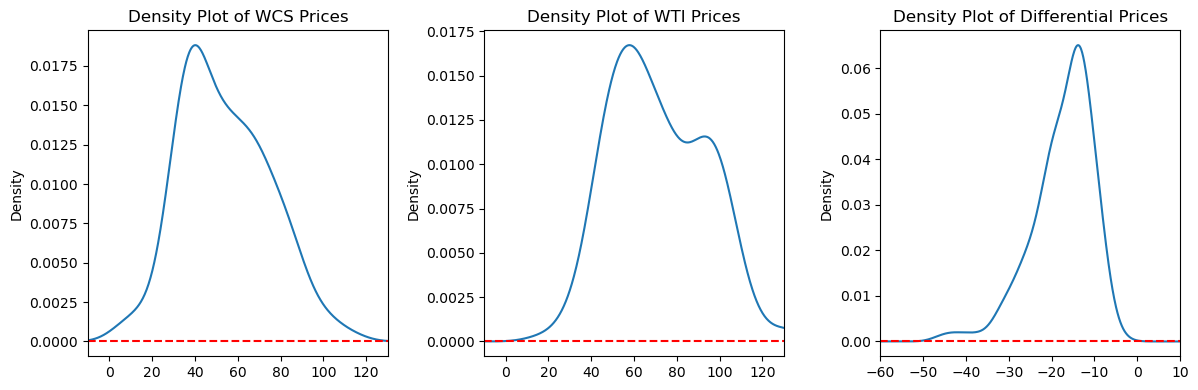

In [51]:
fig, axes = plt.subplots(1,3, figsize = (12, 4))

prices['WCS Price'].plot.density(xlim=(-10, 130), ax=axes[0], title='Density Plot of WCS Prices')
axes[0].axhline(0,linestyle="--", color='red')
prices['WTI Price'].plot.density(xlim=(-10, 130), ax=axes[1], title='Density Plot of WTI Prices')
axes[1].axhline(0,linestyle="--", color='red')
prices['Differential'].plot.density(xlim=(-60, 10), ax=axes[2], title='Density Plot of Differential Prices')
axes[2].axhline(0,linestyle="--", color='red')

fig.tight_layout()

These plots make sense. WCS and WTI have similar density structures, although the peak for WCS is roughly 15 USD lower than for WTI. This validates what we saw in the plot for the differential, which had its peak at approximately -15 USD.

#### More in Depth on the Differential (our object of interest)
Seen above, the differential is typically in the range of 10-25 USD but frequently spikes to 30 or 40. Many of these instances are due to acute capacity constraints or market dynamics (such as refinery closures). The difference in grade and transport costs (the other two key contributing factors to the differential) have remained relatively constant over this period. As such, events related to supply constraints and/or market changes are almost always to blame for these intense spikes. Let's try to see how often the differential falls within its normal range of 10-25 USD. 

(array([0, 1, 2]),
 [Text(0, 0, 'Low (< 10 USD)'),
  Text(1, 0, 'Standard (10-25 USD)'),
  Text(2, 0, 'High (> 25 USD)')])

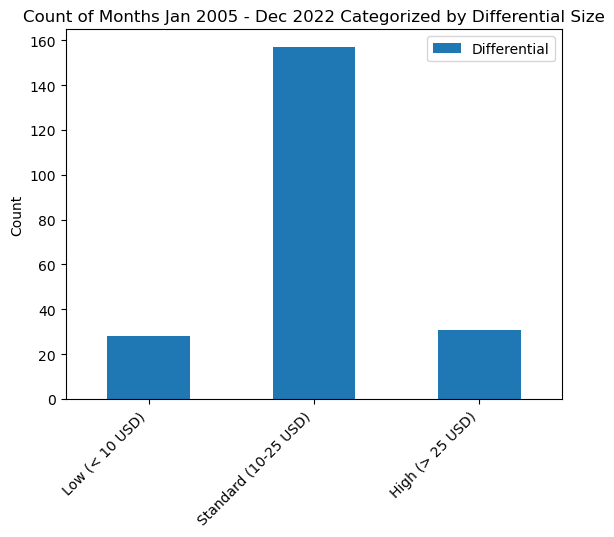

In [52]:
def diffclass(x):
    if abs(x) > 25:
        out = "High (> 25 USD)"
    elif abs(x) > 10:
        out = "Standard (10-25 USD)"
    else:
        out = "Low (< 10 USD)"
    return out

x = (prices['Differential'].apply(diffclass))
x = pd.DataFrame(x)
x = x.apply(pd.value_counts)
x = x.reindex(['Low (< 10 USD)', 'Standard (10-25 USD)', 'High (> 25 USD)'])
x.plot.bar(title='Count of Months Jan 2005 - Dec 2022 Categorized by Differential Size', 
           ylabel='Count')
plt.xticks(rotation=45, ha='right')


Above is a bar plot representing how often the differential falls into certain categories. As we can see, over the period of 2005-2022, it most frequently was in the range of 10-25 USD, but there was still significant amount of months where the average monthly price was above or below this range.

### Some VERY Elementary Analysis
* The below shows the coefficient of variation for our differential, which represents relative volatility. This is calculated by dividing the standard deviation by the mean.

In [53]:
dif1 = np.abs(prices['Differential'].std() / prices['Differential'].mean())
print(f'The coefficient of variation for the differential from 2005-2022 was {dif1}.')

The coefficient of variation for the differential from 2005-2022 was 0.40485897327185716.


This number by itself isn't very insightful, but it could be valuable to see if and how this number has been changing when isolating for specific periods in time.

In [54]:
prices = prices.set_index('Date')

dif2 = np.abs(prices['2008-01-01':'2012-12-01']['Differential'].std() / prices['2008-01-01':'2012-12-01']['Differential'].mean())
dif3 = np.abs(prices['2013-01-01':'2017-12-01']['Differential'].std() / prices['2013-01-01':'2017-12-01']['Differential'].mean())
dif4 = np.abs(prices['2018-01-01':'2022-12-01']['Differential'].std() / prices['2018-01-01':'2022-12-01']['Differential'].mean())

print(f'The coefficient of variation for the differential from 2008-2012 was {dif2}.')
print(f'The coefficient of variation for the differential from 2013-2017 was {dif3}.')
print(f'The coefficient of variation for the differential from 2018-2022 was {dif4}.')

The coefficient of variation for the differential from 2008-2012 was 0.38652073709029344.
The coefficient of variation for the differential from 2013-2017 was 0.40020035854427305.
The coefficient of variation for the differential from 2018-2022 was 0.4764791723130897.


As one can see, the relative volatility of the differential has been significantly growing over time. 

### Canadian Oil Production - Retrieved from the US Energy Information Agency
Data source for 1973-2021: https://www.eia.gov/international/data/world/petroleum-and-other-liquids/annual-petroleum-and-other-liquids-production

Our main data source, from the EIA, includes yearly average values for Canadian oil production. This is measured in thousands of barrels per day. For example, our first row indicates that in 1973, per day Canadian production averaged 1.798 M barrels per day. For 2022 production, we used the average of 2018-2021 values. Measurements are not the same from different sources (they were systematically different for every year) so it would be inconsistent to pull from elsewhere. If anything, this is a conservative estimate since production is likely to have grown in 2022 due to higher prices.

We realize that the units and frequency in which Canadian oil production is measured may be confusing. Later on, when we create our new dataset, we will have more interpretable measures for our production. 

In [55]:
production = pd.read_csv("Production Data.csv")
production.head()

,Year,Country,Canada Total petroleum and other liquids (Mb/d),"Crude oil, NGPL, and other liquids (Mb/d)",Crude oil including lease condensate (Mb/d),NGPL (Mb/d),Other liquids (Mb/d),Refinery processing gain (Mb/d),Unnamed: 8,Country.1,Production,United States Total petroleum and other liquids (Mb/d),"Crude oil, NGPL, and other liquids (Mb/d).1",Crude oil including lease condensate (Mb/d).1,NGPL (Mb/d).1,Other liquids (Mb/d).1,Refinery processing gain (Mb/d).1
0,1973,Canada,1798.109589,1798.109589,1798.109589,NaN,NaN,NaN,NaN,United States,NaN,9207.953296,9207.953296,9207.953296,NaN,NaN,NaN
1,1974,Canada,1550.953425,1550.953425,1550.953425,NaN,NaN,NaN,NaN,United States,NaN,8774.205438,8774.205438,8774.205438,NaN,NaN,NaN
2,1975,Canada,1430.230137,1430.230137,1430.230137,NaN,NaN,NaN,NaN,United States,NaN,8374.736962,8374.736962,8374.736962,NaN,NaN,NaN
3,1976,Canada,1313.983607,1313.983607,1313.983607,NaN,NaN,NaN,NaN,United States,NaN,8131.639273,8131.639273,8131.639273,NaN,NaN,NaN
4,1977,Canada,1321.134247,1321.134247,1321.134247,NaN,NaN,NaN,NaN,United States,NaN,8244.561600,8244.561600,8244.561600,NaN,NaN,NaN


This doesn't look very accessible - let's clean things up again and also add our 2022 production data. We will rename our column headings to be more easily understandable. 

Index(['Year', 'Country',
       '        Canada Total petroleum and other liquids (Mb/d)',
       '            Crude oil, NGPL, and other liquids (Mb/d)',
       '                Crude oil including lease condensate (Mb/d)',
       '                NGPL (Mb/d)', '                Other liquids (Mb/d)',
       '            Refinery processing gain (Mb/d)', 'Unnamed: 8',
       'Country.1', '    Production',
       '       United States Total petroleum and other liquids (Mb/d)',
       '            Crude oil, NGPL, and other liquids (Mb/d).1',
       '                Crude oil including lease condensate (Mb/d).1',
       '                NGPL (Mb/d).1',
       '                Other liquids (Mb/d).1',
       '            Refinery processing gain (Mb/d).1'],
      dtype='object')


/tmp/ipykernel_587/3776621912.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  production = production.append(s, ignore_index=True)


<Axes: title={'center': 'Canadian Total Production (1973 - 2021)'}, xlabel='Year', ylabel='Production (000s of BPD)'>

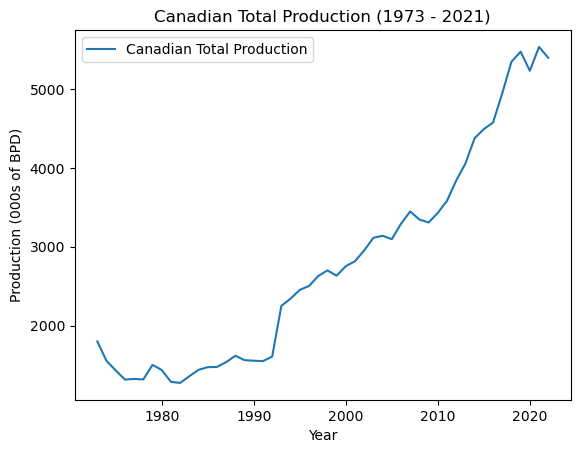

In [56]:
print(production.columns) #get a look at how these column names are stored (quite strangely)

production=production.drop(['Unnamed: 8', '    Production'], axis=1)

colnames = {'        Canada Total petroleum and other liquids (Mb/d)':'Canadian Total Production',
           '            Crude oil, NGPL, and other liquids (Mb/d)':'Canada Crude Production',
           '                Crude oil including lease condensate (Mb/d)':'Canada Crude + Consdensate Production',
           '                NGPL (Mb/d)':'Canada NPGL',
           '                Other liquids (Mb/d)':'Canada Other Liquids',
           '            Refinery processing gain (Mb/d)':'Canada Refinery Processing Gain', 
           '       United States Total petroleum and other liquids (Mb/d)':'USA Total Production',
           '            Crude oil, NGPL, and other liquids (Mb/d).1':'USA Crude Production',
           '                Crude oil including lease condensate (Mb/d).1':'USA Crude + Consdensate Production',
           '                NGPL (Mb/d).1':'USA NPGL',
           '                Other liquids (Mb/d).1':'USA Other Liquids',
           '            Refinery processing gain (Mb/d).1':'USA Refinery Processing Gain',}

production.rename(columns=colnames, inplace=True)

s = [2022]

production = production.append(s, ignore_index=True)

production.loc[49, 'Year'] = 2022
production.loc[49, 'Country'] = 'Canada'
production.loc[49, 'Canadian Total Production'] = 5399.458


production.plot('Year','Canadian Total Production',
                title='Canadian Total Production (1973 - 2021)',
                ylabel='Production (000s of BPD)')

Note that our data is from 1973 - 2022. This is great as is shows the longer run change in production, but unfortunately all of our other data is from 2005-2022 and on a monthly basis (this was the only free data available). Below, we will alter the production data so that it can be used with our other datasets. While this is less than ideal, growth in Canadian oil production is fairly steady especially when compared to the volatility of our other variables. As seen on the left graph, over time (including our 2005-2022 time span of interest), the growth in production is fairly consistent so it shouldn't impact our results too significantly. 

Currently, we only have one row per year but the rest of our data (ex. exchange rates and prices) are at a monthly average frequency. Since there was no free monthly data available, we will have to convert to a monthly frequency by multiplying each row 12 times.

In [57]:
production1 = production.drop(index=range(0,32))

production1 = production1.loc[production1.index.repeat(12)] 

production1 = production1.reset_index()

production1

,index,Year,Country,Canadian Total Production,Canada Crude Production,Canada Crude + Consdensate Production,Canada NPGL,Canada Other Liquids,Canada Refinery Processing Gain,Country.1,USA Total Production,USA Crude Production,USA Crude + Consdensate Production,USA NPGL,USA Other Liquids,USA Refinery Processing Gain,0
0,32,2005.0,Canada,3096.284614,3018.907614,2368.877597,645.430016,4.6,77.377,United States,8327.137027,7337.737008,5183.712329,1716.994559,437.030121,989.400019,NaN
1,32,2005.0,Canada,3096.284614,3018.907614,2368.877597,645.430016,4.6,77.377,United States,8327.137027,7337.737008,5183.712329,1716.994559,437.030121,989.400019,NaN
2,32,2005.0,Canada,3096.284614,3018.907614,2368.877597,645.430016,4.6,77.377,United States,8327.137027,7337.737008,5183.712329,1716.994559,437.030121,989.400019,NaN
3,32,2005.0,Canada,3096.284614,3018.907614,2368.877597,645.430016,4.6,77.377,United States,8327.137027,7337.737008,5183.712329,1716.994559,437.030121,989.400019,NaN
4,32,2005.0,Canada,3096.284614,3018.907614,2368.877597,645.430016,4.6,77.377,United States,8327.137027,7337.737008,5183.712329,1716.994559,437.030121,989.400019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,49,2022.0,Canada,5399.458000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
212,49,2022.0,Canada,5399.458000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
213,49,2022.0,Canada,5399.458000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
214,49,2022.0,Canada,5399.458000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0


And there we have it! Note that we only added a 2022 number for Canadian total production because this is the production variable that we will be using moving forward.

### A Look at Canadian GDP - Pulled from Statistics Canada
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610043402

As discussed at the beginning, the oil industry is a significant component of the Canadian economy. From Statistics Canada, we are including GDP measures to understand how they are correlated with oil prices, which will be done in Part 2. 

In [58]:
cadgdp = pd.read_csv("GDP Data.csv", parse_dates = ["REF_DATE"])

print(cadgdp.shape)

(7740, 17)


Over 7000 rows seems like a lot! Upon further inspection, this dataset had an individual row for each industry and for each time period. Since we're only concerned about overall Canadian GDP, we drop all rows except for those measuring "all industries" - in other words, total GDP:

In [59]:
cadgdp1 = cadgdp.loc[cadgdp['North American Industry Classification System (NAICS)'] == 'All industries [T001]']

cadgdp1.tail()

,REF_DATE,GEO,DGUID,Seasonal adjustment,Prices,North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
210,2022-08-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,All industries [T001],Dollars,81,millions,6,v65201210,1.1.1.1,2064938.0,NaN,NaN,NaN,0
211,2022-09-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,All industries [T001],Dollars,81,millions,6,v65201210,1.1.1.1,2068200.0,NaN,NaN,NaN,0
212,2022-10-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,All industries [T001],Dollars,81,millions,6,v65201210,1.1.1.1,2069351.0,NaN,NaN,NaN,0
213,2022-11-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,All industries [T001],Dollars,81,millions,6,v65201210,1.1.1.1,2071062.0,NaN,NaN,NaN,0
214,2022-12-01,Canada,2016A000011124,Seasonally adjusted at annual rates,Chained (2012) dollars,All industries [T001],Dollars,81,millions,6,v65201210,1.1.1.1,2068605.0,NaN,NaN,NaN,0


We now have the rows we want, but there's still a lot of columns with information not useful to our project. Below, we will drop and rename our columns to be more useful to the reader. 

In [60]:
#Just some data cleaning to get what we want from this set
cadgdp1 = cadgdp1[['REF_DATE', 'GEO', 'Prices', 'SCALAR_FACTOR', 'VALUE']]

colnames = {'REF_DATE':'Date',
            'GEO':'Country',
            'SCALAR_FACTOR':'Scale',
            'VALUE':'GDP'}

cadgdp1.rename(columns=colnames, inplace=True)

cadgdp1.head()

,Date,Country,Prices,Scale,GDP
0,2005-02-01,Canada,Chained (2012) dollars,millions,1516009.0
1,2005-03-01,Canada,Chained (2012) dollars,millions,1510876.0
2,2005-04-01,Canada,Chained (2012) dollars,millions,1522079.0
3,2005-05-01,Canada,Chained (2012) dollars,millions,1528603.0
4,2005-06-01,Canada,Chained (2012) dollars,millions,1533199.0


<Axes: title={'center': 'Canadian GDP Since 2005'}, xlabel='Date', ylabel='Trillions of Dollars (CAD)'>

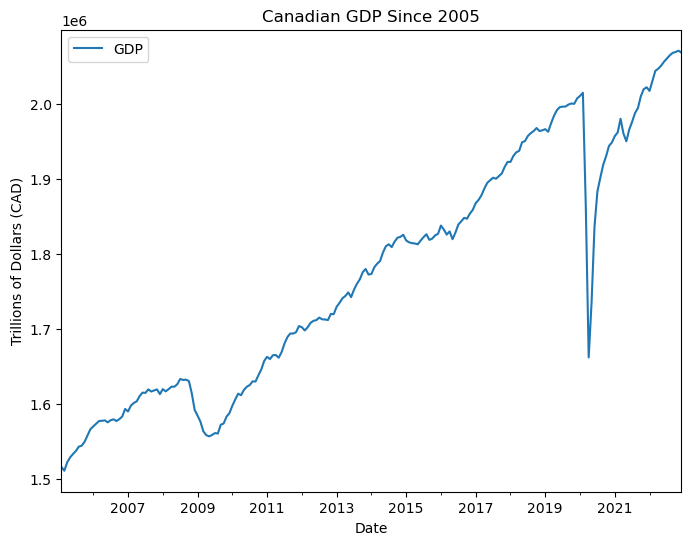

In [61]:
cadgdp1.plot("Date", 
             "GDP", 
             title="Canadian GDP Since 2005",
             ylabel='Trillions of Dollars (CAD)',
             figsize=(8,6))

### Canada-US Exchange Rates - Data from the Federal Reserve Bank of St. Louis
https://fred.stlouisfed.org/series/DEXCAUS

The last dataset we need to include is exchange rate data. This is because our prices are measured in USD but our interest is from a Canadian perspective, so it is more appropriate to convert our values into CAD. As well, the Canadian Dollar has historically been quite highly correlated with oil prices, so having this data will be useful in Part 2.

In [62]:
xrates = pd.read_csv("Exchange rate data.csv", parse_dates=["DATE"])

xrates.head()

,DATE,DEXCAUS
0,2005-02-01,1.240053
1,2005-03-01,1.216026
2,2005-04-01,1.235900
3,2005-05-01,1.255529
4,2005-06-01,1.240168


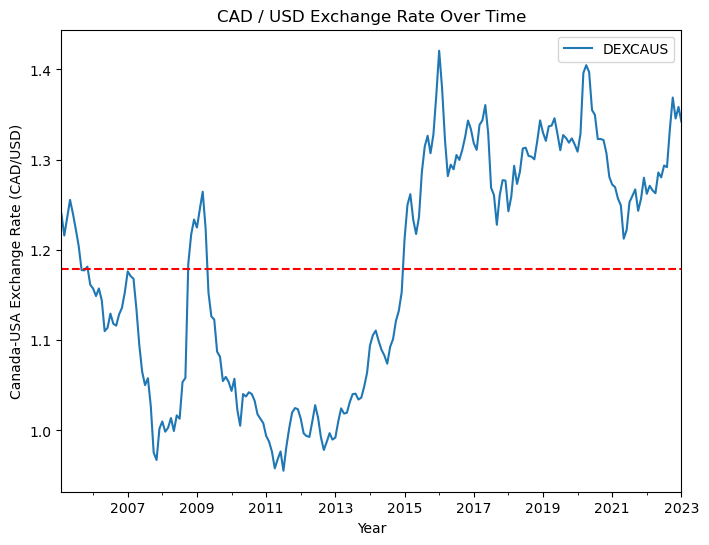

In [63]:
y = xrates.plot("DATE", "DEXCAUS", title="CAD / USD Exchange Rate Over Time", figsize = (8,6),
               ylabel = 'Canada-USA Exchange Rate (CAD/USD)',
               xlabel = 'Year')
y.axhline(xrates['DEXCAUS'].mean(),linestyle="--", color='red')

### We've Now Went Through all the Raw Data - Let's Make Our Own Dataset!

What we want to create is a dataset that contains price, production, exchange rate, and GDP information. Then we can add some new columns to understand what the value of production and impact of the differential is on a monthly basis. In the code below, we first pull relevant columns from our primary datasets. Using these columns, we then create new variables to calculate monthly values for Canadian production and differential impact. This is done in both USD and CAD. 

In [64]:
prices = prices.reset_index()

df = pd.DataFrame(xrates['DEXCAUS'])

df['Date'] = pd.DataFrame(prices['Date'])

df['WCS Prices'] = pd.DataFrame(prices['WCS Price'])

df['WTI Prices'] = pd.DataFrame(prices['WTI Price'])

df['Differential'] = pd.DataFrame(prices['Differential'])

df['GDP'] = pd.DataFrame(cadgdp1['GDP'])

df['Average Production Per Day (Millions of BPD)'] = pd.DataFrame(production1['Canadian Total Production'] / 1000)

df['Differential (CAD)'] = df['Differential'] * df['DEXCAUS']

df.set_index('Date', inplace=True)

df.index = df.index.to_period('M') #changing the index to month (removed the -01 from each)

df['Monthly Production Value (Billions of USD)'] = (df['WCS Prices'] * df['Average Production Per Day (Millions of BPD)'] / 
                                                    1000) * df.index.daysinmonth
#using df.index.daysinmonth since there are different days in different months (also accounts for leap years)

df['Monthly Production Value (Billions of CAD)'] = (df['WCS Prices'] *df['DEXCAUS'] * 
                                                    df['Average Production Per Day (Millions of BPD)'] / 1000) * df.index.daysinmonth

df['Monthly Differential Impact (Billions of USD)'] = np.abs((df['Average Production Per Day (Millions of BPD)'] * 
                                                              df['Differential'] / 1000) * df.index.daysinmonth)

df['Monthly Differential Impact (Billions of CAD)'] = np.abs((df['Average Production Per Day (Millions of BPD)'] * 
                                                              df['Differential (CAD)'] / 1000) * df.index.daysinmonth)

df.head()

,DEXCAUS,WCS Prices,WTI Prices,Differential,GDP,Average Production Per Day (Millions of BPD),Differential (CAD),Monthly Production Value (Billions of USD),Monthly Production Value (Billions of CAD),Monthly Differential Impact (Billions of USD),Monthly Differential Impact (Billions of CAD)
Date,,,,,,,,,,,
2005-02,1.240053,28.44,48.05,-19.61,1516009.0,3.096285,-24.317432,2.465633,3.057515,1.700108,2.108223
2005-03,1.216026,36.50,54.63,-18.13,1510876.0,3.096285,-22.046553,3.503446,4.260282,1.740205,2.116134
2005-04,1.235900,31.02,53.22,-22.20,1522079.0,3.096285,-27.436980,2.881402,3.561125,2.062126,2.548581
2005-05,1.255529,27.46,49.87,-22.41,1528603.0,3.096285,-28.136395,2.635743,3.309251,2.151020,2.700667
2005-06,1.240168,38.16,56.42,-18.26,1533199.0,3.096285,-22.645471,3.544627,4.395933,1.696145,2.103505


Finally, we have a usable data set with the relevant Canadian information that we want!

## Part 2: Analysis on Which Economic Indicators are Impacted by the Differential

Remember that the aim of our project is to understand the impact of the WCS/WTI price differential on the Canadian oil industry. Firstly, we want to see if the impact of the differential is significant. Below, we will do so by finding mean values for monthly differential impacts and then see if this has been changing over time. After showing that the differential impact is significant, we want to understand how oil prices and the differential are correlated to our economic indicators, which include GDP and the exchange rate. Doing so will help us get a better understanding of the extent to which our interest variables impact Canada's economy as a whole. 

In [65]:
impact1 = df['Monthly Differential Impact (Billions of CAD)'].mean()
impact2 = df['2008-01':'2012-12']['Monthly Differential Impact (Billions of CAD)'].mean()
impact3 = df['2013-01':'2017-12']['Monthly Differential Impact (Billions of CAD)'].mean()
impact4 = df['2018-01':'2022-12']['Monthly Differential Impact (Billions of CAD)'].mean()
impact5 = df['Monthly Differential Impact (Billions of CAD)'].sum()

print(f'The average monthly impact of the differential from 2005-2022 was ${impact1:.3f} Billion CAD.')
print(f'The average monthly impact of the differential from 2008-2012 was ${impact2:.3f} Billion CAD.')
print(f'The average monthly impact of the differential from 2013-2017 was ${impact3:.3f} Billion CAD.')
print(f'The average monthly impact of the differential from 2018-2022 was ${impact4:.3f} Billion CAD.')
print(f'The cumulative impact of the differential from 2005-2022 was ${impact5:.3f} Billion CAD.')

The average monthly impact of the differential from 2005-2022 was $2.649 Billion CAD.
The average monthly impact of the differential from 2008-2012 was $1.818 Billion CAD.
The average monthly impact of the differential from 2013-2017 was $2.635 Billion CAD.
The average monthly impact of the differential from 2018-2022 was $3.572 Billion CAD.
The cumulative impact of the differential from 2005-2022 was $572.207 Billion CAD.


As we can see, the differential has a massive impact! The average over the last five years of 3.57 billion CAD per month, which amounts to over 100 million CAD per day. As such, over the last 18 years, this cumulative effect has totalled 572 billion CAD. In other words, this is the additional value that Canada's oil industry could be generating had WCS not been sold as a discount. 
### These findings create the basis for our project since even a small reduction in the differential over time amounts to large amounts of money and impacts GDP (shown below). 

#### Now Let's Take a Look at All our Data

In [66]:
df.describe()

,DEXCAUS,WCS Prices,WTI Prices,Differential,GDP,Average Production Per Day (Millions of BPD),Differential (CAD),Monthly Production Value (Billions of USD),Monthly Production Value (Billions of CAD),Monthly Differential Impact (Billions of USD),Monthly Differential Impact (Billions of CAD)
count,216.000000,216.000000,216.000000,216.00000,2.150000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.178506,53.962037,71.417917,-17.45588,1.773706e+06,4.266437,-20.321295,6.878338,8.001145,2.238456,2.649106
std,0.130929,20.954957,22.321942,7.06717,1.614657e+05,0.859660,8.049072,2.775043,3.275839,0.992751,1.281843
min,0.955315,3.500000,16.550000,-45.93000,1.510876e+06,3.096285,-60.649646,0.549638,0.772129,0.614365,0.752094
25%,1.041851,37.675000,54.252500,-20.90000,1.619354e+06,3.429993,-24.044417,4.956521,5.890167,1.687345,1.924564
50%,1.212335,52.060000,69.585000,-15.87000,1.773250e+06,4.217537,-18.777820,6.553534,7.435418,1.999132,2.454969
75%,1.299947,69.092500,89.620000,-12.83250,1.920772e+06,5.234650,-15.095695,8.752537,9.622204,2.591270,2.870876
max,1.420811,114.950000,134.020000,-4.34000,2.071062e+06,5.537451,-5.881469,16.387895,20.983451,7.369210,9.730894


We want to see how these variables are correlated. Since the five rightmost columns are built from the others, their correlation coefficients will be redundant and not produce any new information. As such, we will remove these columns and look at correlation between exchange rates, our prices, GDP, and production. 

In [67]:
df3 = df.drop(['Differential (CAD)', 'Monthly Production Value (Billions of USD)',
               'Monthly Production Value (Billions of CAD)',
               'Monthly Differential Impact (Billions of USD)',
               'Monthly Differential Impact (Billions of CAD)'], axis=1)

df3.corr()

,DEXCAUS,WCS Prices,WTI Prices,Differential,GDP,Average Production Per Day (Millions of BPD)
DEXCAUS,1.000000,-0.685942,-0.730068,0.272055,0.643763,0.720415
WCS Prices,-0.685942,1.000000,0.948610,-0.031109,-0.116919,-0.239948
WTI Prices,-0.730068,0.948610,1.000000,-0.345806,-0.145129,-0.272813
Differential,0.272055,-0.031109,-0.345806,1.000000,0.112258,0.150217
GDP,0.643763,-0.116919,-0.145129,0.112258,1.000000,0.970542
Average Production Per Day (Millions of BPD),0.720415,-0.239948,-0.272813,0.150217,0.970542,1.000000


#### Some Noticeable Coefficients:

* The exchange rate with WCS, WTI, and Differential Prices. This negative correlation makes sense since DEXCAUS is the number of CAD per USD. As such, when the WCS and WTI prices rise, you need less CAD per USD; in other words the Canadian dollar strengthens. Amazingly, the correlation coefficients for oil prices and exchange rate are higher than for GDP and the exchange rate. Also note that a negative coefficient for the differential makes sense since it is a negative value. 
* GDP with Average Production Per Day; a coefficient of 0.970542. 

In conclusion, our analysis in Part 2 shows a few important things:

1. The impact of the differential is very significant, amounting to billions of dollars per month. These numbers are so large that it gives credence to our interest.
2. When isolating for more recent years' data, we see an increase in the differential. This indicates that the impacts associated with a rising differential will continue to increase if left unchecked. 
3. Our correlation coefficients show significant relationships between oil prices and key economic indicators; namely GDP and the CAD/USD exchange rate. This gives further evidence of why this topic is important to investigate, since changes to the oil industry are felt nationwide.

# Part 3 - Discussion on the Price Differential and What "Segments" of it can be Changed

The WTI (USA Oil) /WCS (CAN Oil) differential is comprised of three factors:
* Endowments (US has higher grade oil than Canada)
* Transport costs (US has less average distance that oil needs to travel from extraction until export than in Canada)
* Export capacity (US has more capacity to move oil than Canada)

* https://www.oilsandsmagazine.com/market-insights/crude-oil-pricing-differentials-why-alberta-crude-sells-at-deep-discount-to-wti
* https://www.fraserinstitute.org/sites/default/files/cost-of-pipeline-constraints-in-canada-2019.pdf

Though from the above we acknowledge that the differential is quite volatile, historically the differential converges around 15-20 USD. Multiple sources have suggested that in the long-run, the differential is composed of the three factors above. Approximately 5 of these dollars are attributable to differences in endowments, 3-4 dollars to export capacity, and 6-7 to transport costs. As discussed before, note that the differential varies well above and below $15 due to market dynamics, but these estimates seem to align with our data. Based on our data, the median is 15.87 USD, and 75% of the time is below 12.83 USD. This 12-13 USD range aligns with the sum of difference in endowments as well as transport costs. As such, we feel that the estimate of 3-4 dollars due to export capacity (on average) is reasonable. While endowments and transport costs cannot be changed, it is worth examining the economic impacts of this 3-4 dollar differential vanishing, since it is possible through public policy.


In [68]:
prices['Differential'].describe()

count    216.00000
mean     -17.45588
std        7.06717
min      -45.93000
25%      -20.90000
50%      -15.87000
75%      -12.83250
max       -4.34000
Name: Differential, dtype: float64

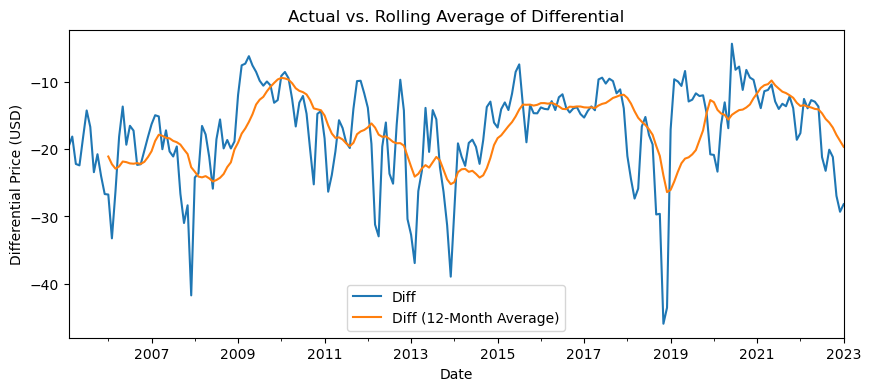

In [69]:
fig, ax = plt.subplots(figsize=(10,4))

df['Differential'].plot(title='Actual vs. Rolling Average of Differential',
                       ylabel = 'Differential Price (USD)')
df.rolling(12)['Differential'].mean().plot()
ax.legend(['Diff', 'Diff (12-Month Average)'])

# Part 4 - Sensitivity Analysis based on Realistic Changes to Key Variables to Quantify the Price Differential


Up until this point, we've mostly done data cleaning and visualization with historical information. In this section, we attempt to use this historical information to make predictions about the future. 

Why, you might ask? We have both long been fascinated by the interrelationship between politics and the economy, and thought it would be relevant for both policymakers and financiers across the nation to understand what the effect of a reduced WTI/WCS differential could mean for Canadians. We knew that, in order to provide genuine insight to these stakeholders, our result could not be a single value. Rather, our result would have to be a range of values, with reasonable assumptions factored into the weight of each to approximate an answer. 

The purpose of this section is to do exactly that: develop a distribution estimating the most likely value of per day GDP gain to Canada's economy based on reasonable assumptions informed by our cleaned historical data. There are three input variables that we need to predict, shown in the equation below:

Daily impact of differential (CAD) = (production/day)(exchange rate)(diff improvement)

Our proposed method of analysis with these five discrete instances of the independent variable is to use Monte Carlo. We must construct three probability distributions:

1. Exchange rate values - based on existing data
2. Production data - based on existing data. Though production is steadily growing every year, we will use a conservative estimate and assume it remains at 2022 levels. 
3. Improvement in the differential - we will create 5 of these, each centered around one of our target values (1, 1.50, 2, 2.50, 3). 

By accurately modelling what each of these inputs would do to the daily reduction in the differential impact (and daily increase in Canadian GDP), we can capture the expected effects of implementing policies of varying intensity.

At first, this may not seem intuitive. You may be thinking, "How can you model the effects of a policy change in the context of your project?" The honest truth is, we can't... at least, not exactly. But where we aim to capture policy changes of varying intensity is in our differential improvement input (a.k.a. our independent variable). We intentionally pick values ranging from 1-3 USD because most estimates show that 3-4 USD of the 15 USD differential are a result of mismatched export capacity relative to Canadian production. Once again, because we know that transport costs (6-7 USD) and natural endowments (4-5 USD) cannot be improved upon, we implicitly establish a range of values where policy can make an impact. To put it simply in the context of our model, a 0 USD reduction in the differential is our lower bound. Assuming that export capacity constraints remain at the status quo and production continues to increase, even with a constant price differential, we expect to see the impact of the differential on Canadian GDP widen. This is a trivial finding and not very informative, but it does allow us a reference point to compare against. If the Federal government were to implement any policy beyond the status quo, we would expect it to have some positive effect on reducing the differential. We are not in a position to rank policy intensity as we believe our work would become too theoretical, but our hope is that this context allows you to understand that as our selected differential improvement value increases, it must intuitively mean that the Canadian government is planning to take more radical action to reduce constraints.

We give examples of what each dollar value of differential reduction COULD look like:
* 1 USD - Federal Government offers subsidies to trucking companies near remote ports with the hope of reducing transport times to foreign markets. 
* 2 USD - Canadian Federal Government in negotiations with shipping giants Maersk and Hapag-Lloyd to establish temporary floating storage facilities as TMP nears completion.
* 3 USD - CP, CN land 5-year Federal contract to increase transnational oil transport by 200,000 barrels per day.

GRAPHS 1-5: DIFFERENTIAL CENTERED AROUND OUR FIVE VALUES FOR THE INDEPENDENT VARIABLE (1 USD, 1.5 USD, 2 USD, 2.5 USD, 3 USD)

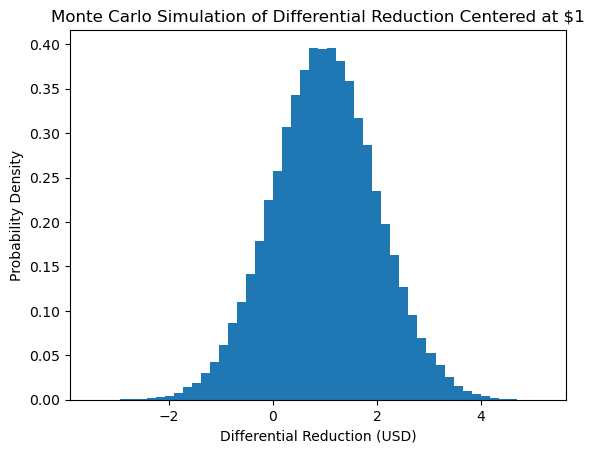

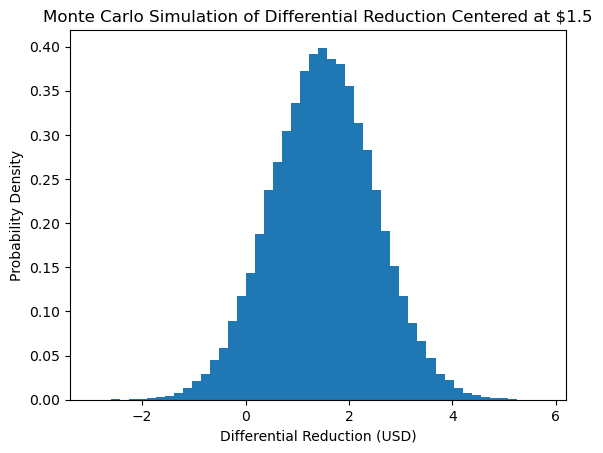

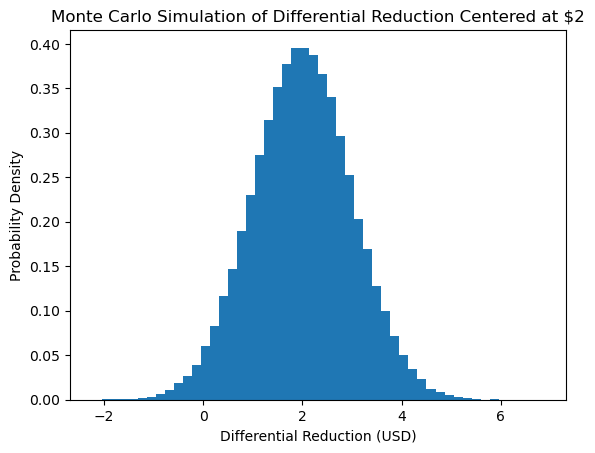

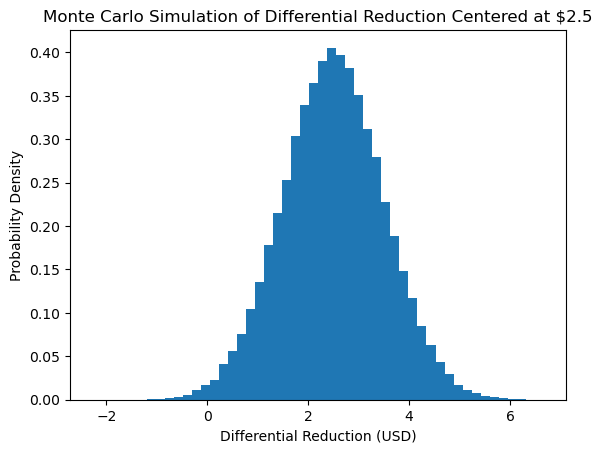

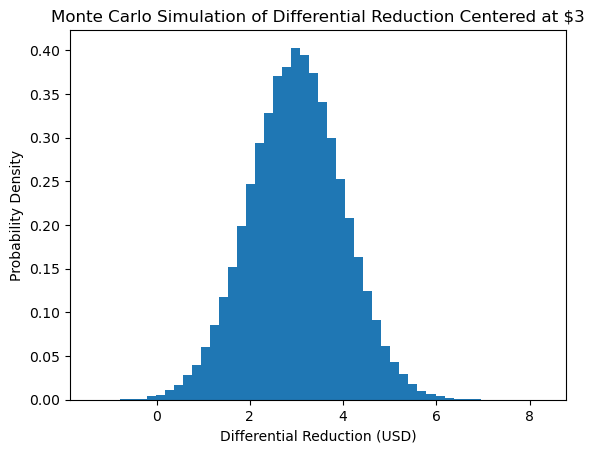

In [70]:
mu = 0 #equal to 0 to ensure normal distribution
sigma = 1 
num_simulations = 100000 #we want at least 100000 draws of each

differential_1_dollar = np.random.normal(mu + 1, sigma, num_simulations) #mu + 1 ensures that distribution is centered around intended value
time_samples = np.random.uniform(0, 1, num_simulations)
plt.hist(differential_1_dollar, bins=50, density=True)

plt.xlabel('Differential Reduction (USD)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Centered at $1')
plt.show()

differential_1_5_dollar = np.random.normal(mu + 1.5, sigma, num_simulations)
time_samples = np.random.uniform(0, 1, num_simulations)
plt.hist(differential_1_5_dollar, bins=50, density=True)

plt.xlabel('Differential Reduction (USD)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Centered at $1.5')
plt.show()

differential_2_dollar = np.random.normal(mu + 2, sigma, num_simulations)
time_samples = np.random.uniform(0, 1, num_simulations)
plt.hist(differential_2_dollar, bins=50, density=True)

plt.xlabel('Differential Reduction (USD)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Centered at $2')
plt.show()

differential_2_5_dollar = np.random.normal(mu + 2.5, sigma, num_simulations)
time_samples = np.random.uniform(0, 1, num_simulations)
plt.hist(differential_2_5_dollar, bins=50, density=True)

plt.xlabel('Differential Reduction (USD)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Centered at $2.5')
plt.show()

differential_3_dollar = np.random.normal(mu + 3, sigma, num_simulations)
time_samples = np.random.uniform(0, 1, num_simulations)
plt.hist(differential_3_dollar, bins=50, density=True)

plt.xlabel('Differential Reduction (USD)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Centered at $3')
plt.show()

GRAPH 6: PRODUCTION DATA DISTRIBUTION

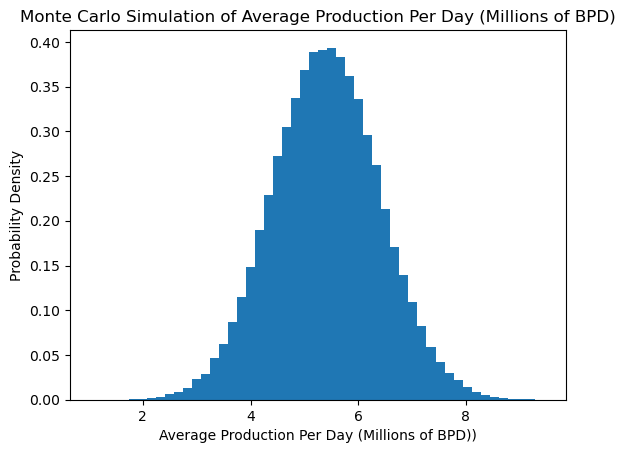

In [71]:
mu = 0
sigma = 1
num_simulations = 100000

production_per_day = np.random.normal(mu + df.loc[df.index == '2022-02', :]['Average Production Per Day (Millions of BPD)'], sigma, num_simulations) 
time_samples = np.random.uniform(0, 1, num_simulations)
plt.hist(production_per_day, bins=50, density=True)

plt.xlabel('Average Production Per Day (Millions of BPD))')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Average Production Per Day (Millions of BPD)')
plt.show()

We are using a conservative estimate for production as we are centering our distribution around the mean 2022 value of average production per day. With production steadily increasing virtually every year, we expect this assumption will understate the true impact of our results. Moreover, as we previously mentioned, our 2022 estimate is itself constructed from the average of 2018-2021, which would only further understate our results.

GRAPH 7: EXCHANGE RATE DATA DISTRIBUTION

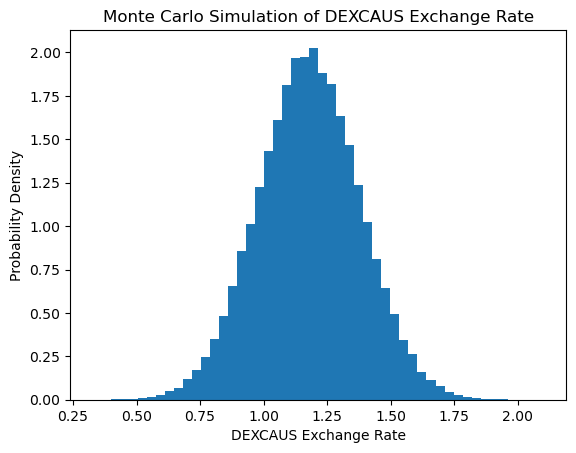

Mean DEXAUS Exchange Rate (2005-2022): 1.1785061299861455


In [72]:
mu = 0
sigma = 0.2 #when sigma was 1, the range was far too large (to the point where the exchange rate went negative), so sigma was changed to 0.2 to show a more realistic range. 
num_simulations = 100000

exchange_rate = np.random.normal(mu + df['DEXCAUS'].mean(), sigma, num_simulations) 
time_samples = np.random.uniform(0, 1, num_simulations)
plt.hist(exchange_rate, bins=50, density=True)

plt.xlabel('DEXCAUS Exchange Rate')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of DEXCAUS Exchange Rate')
plt.show()

print(f"Mean DEXAUS Exchange Rate (2005-2022): {df['DEXCAUS'].mean()}")

There isn't much to say on the exchange rate graph besides the fact that we thought it would be useful to share a sanity check by printing the mean DEXAUS Exchange Rate. As we can see, our predicted values for DEXAUS have the exact same mean as our historical data. 

Now, we must build one small function to put everything together!

In [73]:
print(differential_1_dollar)
print(differential_1_5_dollar)
print(differential_2_dollar)
print(differential_2_5_dollar)
print(differential_3_dollar)
print(production_per_day)
print(exchange_rate)

def diff_reduction(x, production_per_day, exchange_rate):
    result = x * production_per_day * exchange_rate
    result_list = result.tolist()
    return result_list

diff_reduction_1 = diff_reduction(differential_1_dollar, production_per_day, exchange_rate)
diff_reduction_1_5 = diff_reduction(differential_1_5_dollar, production_per_day, exchange_rate)
diff_reduction_2 = diff_reduction(differential_2_dollar, production_per_day, exchange_rate)
diff_reduction_2_5 = diff_reduction(differential_2_5_dollar, production_per_day, exchange_rate)
diff_reduction_3 = diff_reduction(differential_3_dollar, production_per_day, exchange_rate)

[ 0.76466835 -0.14730795  2.13946503 ...  1.2643121   1.71333819
 -0.71561407]
[1.65118246 1.68330593 2.1117254  ... 2.75688691 2.1783989  1.9384942 ]
[0.74416619 0.79211228 2.41336844 ... 1.57059651 1.91193815 0.40453725]
[2.61958602 2.29908801 1.97649368 ... 2.36808336 1.93073106 1.46459777]
[3.49784258 2.55756083 1.49336473 ... 3.98547119 3.782976   3.34429441]
[7.91206322 5.11135388 4.14730767 ... 4.72646623 4.30677229 5.85363007]
[1.20076417 1.11580453 1.17076159 ... 1.48849354 1.41717116 1.00055008]


As you can see, the lists containing the values for each distribution are being assigned to unique variables and are printing successfully! Let's now visualize our data at each instance of our independent variable.

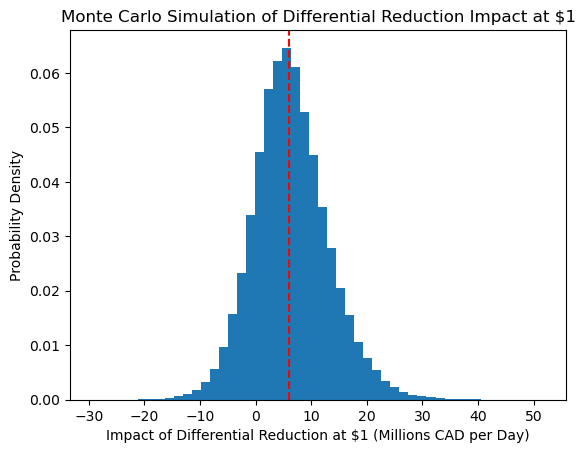

The bottom quartile is $1.9361809371659762 Million CAD per Day.
The median is $5.98576752032067 Million CAD per Day.
The mean is $6.378817729152237 Million CAD per Day.
The top quartile is $10.459433183123128 Million CAD per Day.


In [74]:
plt.hist(diff_reduction_1, bins=50, density=True)
plt.xlabel('Impact of Differential Reduction at $1 (Millions CAD per Day)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Impact at $1')
plt.axvline(np.percentile(diff_reduction_1, 50), linestyle='--', color='red')
plt.show()

print(f'The bottom quartile is ${np.percentile(diff_reduction_1, 25)} Million CAD per Day.')
print(f'The median is ${np.percentile(diff_reduction_1, 50)} Million CAD per Day.')
print(f'The mean is ${np.mean(diff_reduction_1)} Million CAD per Day.')
print(f'The top quartile is ${np.percentile(diff_reduction_1, 75)} Million CAD per Day.')

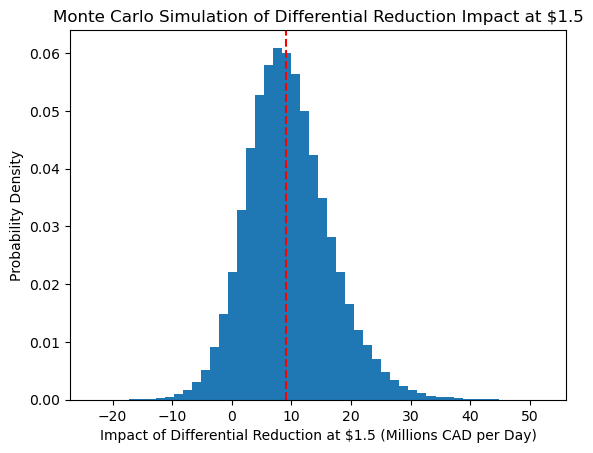

The bottom quartile is $4.827165999612023 Million CAD per Day.
The median is $9.065470818514356 Million CAD per Day.
The mean is $9.591992289468122 Million CAD per Day.
The top quartile is $13.799211329147798 Million CAD per Day.


In [75]:
plt.hist(diff_reduction_1_5, bins=50, density=True)
plt.xlabel('Impact of Differential Reduction at $1.5 (Millions CAD per Day)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Impact at $1.5')
plt.axvline(np.percentile(diff_reduction_1_5, 50), linestyle='--', color='red')
plt.show()

print(f'The bottom quartile is ${np.percentile(diff_reduction_1_5, 25)} Million CAD per Day.')
print(f'The median is ${np.percentile(diff_reduction_1_5, 50)} Million CAD per Day.')
print(f'The mean is ${np.mean(diff_reduction_1_5)} Million CAD per Day.')
print(f'The top quartile is ${np.percentile(diff_reduction_1_5, 75)} Million CAD per Day.')

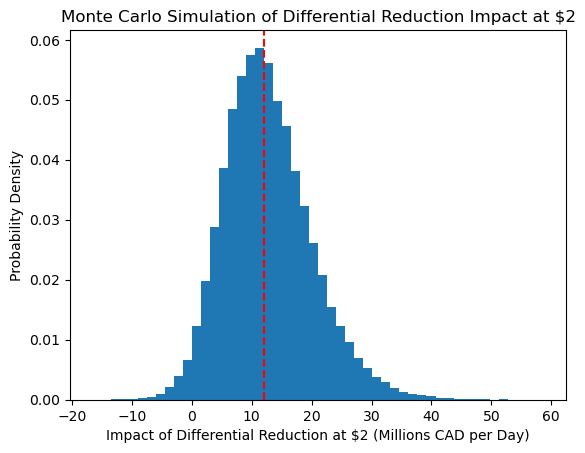

The bottom quartile is $7.677779187441033 Million CAD per Day.
The median is $12.071752927328284 Million CAD per Day.
The mean is $12.761204537148352 Million CAD per Day.
The top quartile is $17.126954652134053 Million CAD per Day.


In [76]:
plt.hist(diff_reduction_2, bins=50, density=True)
plt.xlabel('Impact of Differential Reduction at $2 (Millions CAD per Day)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Impact at $2')
plt.axvline(np.percentile(diff_reduction_2, 50), linestyle='--', color='red')
plt.show()

print(f'The bottom quartile is ${np.percentile(diff_reduction_2, 25)} Million CAD per Day.')
print(f'The median is ${np.percentile(diff_reduction_2, 50)} Million CAD per Day.')
print(f'The mean is ${np.mean(diff_reduction_2)} Million CAD per Day.')
print(f'The top quartile is ${np.percentile(diff_reduction_2, 75)} Million CAD per Day.')

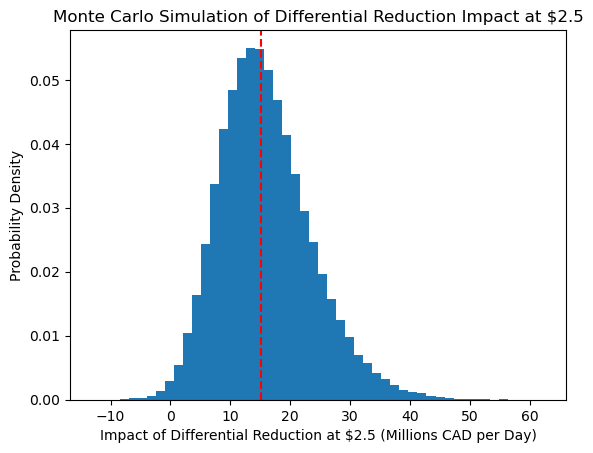

The bottom quartile is $10.506703151434085 Million CAD per Day.
The median is $15.150411232335902 Million CAD per Day.
The mean is $15.930127331090164 Million CAD per Day.
The top quartile is $20.503532719189845 Million CAD per Day.


In [77]:
plt.hist(diff_reduction_2_5, bins=50, density=True)
plt.xlabel('Impact of Differential Reduction at $2.5 (Millions CAD per Day)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Impact at $2.5')
plt.axvline(np.percentile(diff_reduction_2_5, 50), linestyle='--', color='red')
plt.show()

print(f'The bottom quartile is ${np.percentile(diff_reduction_2_5, 25)} Million CAD per Day.')
print(f'The median is ${np.percentile(diff_reduction_2_5, 50)} Million CAD per Day.')
print(f'The mean is ${np.mean(diff_reduction_2_5)} Million CAD per Day.')
print(f'The top quartile is ${np.percentile(diff_reduction_2_5, 75)} Million CAD per Day.')

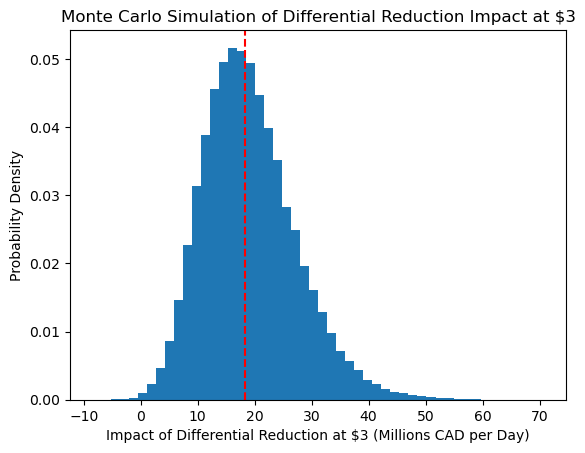

The bottom quartile is $13.32430597270419 Million CAD per Day.
The median is $18.28199538761197 Million CAD per Day.
The mean is $19.128273913233595 Million CAD per Day.
The top quartile is $23.97837215013463 Million CAD per Day.


In [78]:
plt.hist(diff_reduction_3, bins=50, density=True)
plt.xlabel('Impact of Differential Reduction at $3 (Millions CAD per Day)')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Simulation of Differential Reduction Impact at $3')
plt.axvline(np.percentile(diff_reduction_3, 50), linestyle='--', color='red')
plt.show()

print(f'The bottom quartile is ${np.percentile(diff_reduction_3, 25)} Million CAD per Day.')
print(f'The median is ${np.percentile(diff_reduction_3, 50)} Million CAD per Day.')
print(f'The mean is ${np.mean(diff_reduction_3)} Million CAD per Day.')
print(f'The top quartile is ${np.percentile(diff_reduction_3, 75)} Million CAD per Day.')

## Conclusion of Part 4 Results
Assuming the differential is reduced within the range of 1-3 USD, our model suggests that the mean differential reduction is somewhere between 6 and 19 million CAD per day. Given that the reduction in the differential from a policy change is unknown, but would likely fall in between 1-3 USD, we can be confident that there will be sizable benefits from such policy change. Note that all of this was done assuming normal distributions of our input variables and output. In reality, this may not be the case which could skew our results. 

# Part 5 - Discussion on Policy Implications & Conclusion

### Results and Policy Implications

And here we are, at the end of what was a tremendous research exercise over these past few months. As you can see from our results histograms above, any form of public policy that could meaningfully increase Canadian crude export capacity and, by extension, reduce the WTI/WCS differential by even one dollar would add an expected 6 million dollars to Canadian GDP per day. If a policy were to be implemented that reduced the WTI/WCS differential by three dollars, daily GDP would increase by approximately 19 million dollars. That is an astonishingly high number to result from what seems like one simple action on paper. But, as with many things in the real world, it is often more complicated than we think. 

One consideration to be aware of is the fact that our project focused exclusively on the potential benefits to be drawn from the Canadian economy by investing in export capacity, and not the costs associated with the initial investment. To have a more informed discussion on whether or not passing policy to increase export capacity makes sense, we recommend further investigation by interested academics toward monetizing the costs, both financial and other, of building said capacity. Then, using NPV analysis, we can make the best possible policy recommendations for Canadians. 

### Assumptions

We also recognize that our results hold best under certain key assumptions. They are listed in bullet point form below:
* We assume that the makeup of the Canadian economy will remain similar into the future (share of Canadian GDP from oil will remain constant)
* We assume that monthly data is a reasonable proxy for daily information. This could very well not be the case in isolated circumstances, but we believe that the general trends are very similar.
* We assume that the historical distributions of exchange rates will hold. It is obviously very hard to predict exchange rates because they depend on so many factors, but we believe it is as good a guess as any to assume that they will remain constant. However, taking a Monte Carlo approach helps us mitigate the risk of uncertainty surrounding future rates. 
* We assume normal distributions of all input variables as well as our output. In reality they may be non-normal which could skew our results. 

### Concluding Remarks

Nolan and Shaan welcome all readers to engage with the material above. They can be contacted at nolan.petroff23@gmail.com and shaanhooey@gmail.com, respectively.